In [1]:
%matplotlib inline
import csv
import math
import datetime
import numpy as np
import matplotlib.pyplot as plt


In [2]:
import matplotlib as mpl

cmapp = mpl.colors.LinearSegmentedColormap.from_list('my_cmap',['blue','red'],256)
cmapp._init()
alphas = np.linspace(0, 0.8, cmapp.N+3)
cmapp._lut[:,-1] = alphas

In [3]:
datX = []
datL = []
with open('input/crimes.csv', 'rb') as csvfile:
    reader = csv.reader(csvfile, delimiter=',')
    for dat in reader:
        try:
            tim = datetime.datetime.strptime(dat[2], "%m/%d/%Y %I:%M:%S %p")
            lat = float(dat[19])
            lng = float(dat[20])
            datX.append([lat,lng,tim.hour,tim.weekday(),tim.month])
            datL.append([dat[5],dat[7]])
        except:
            pass
X = np.array(datX);
L = np.array(datL);

In [12]:
L[np.char.find(L[:,1],'AIR')>=0,1]='AIRPORT'
L[np.char.find(L[:,0],'NON')>=0,0]='NON-CRIMINAL'
L[np.char.find(L[:,1],'CTA')>=0,1]='CTA'

keep = np.logical_or(np.char.find(L[:,1],'STREET')>=0,np.logical_or(np.char.find(L[:,1],'SIDEWALK')>=0,np.logical_or(L[:,1]=='OTHER',np.logical_or(np.char.find(L[:,1],'LOT/GARAGE')>=0,np.logical_or(L[:,1]=='ALLEY',np.char.find(L[:,1],'CTA')>=0)))))
keep = np.logical_and(keep, np.logical_not(np.logical_or(np.char.find(L[:,0],'ARSON')>=0,np.logical_or(np.char.find(L[:,0],'CARRY')>=0,np.logical_or(np.char.find(L[:,0],'HUMAN')>=0,np.logical_or(np.char.find(L[:,0],'INDECENCY')>=0,np.logical_or(np.char.find(L[:,0],'LIQUOR')>=0,np.logical_or(np.char.find(L[:,0],'GAMBLING')>=0,np.logical_or(np.char.find(L[:,0],'PROSTITUTION')>=0,np.logical_or(np.char.find(L[:,0],'STALKING')>=0,np.logical_or(np.char.find(L[:,0],'KIDNAPPING')>=0,np.logical_or(np.char.find(L[:,0],'INTIMIDATION')>=0,np.logical_or(np.char.find(L[:,0],'OBSCENITY')>=0,np.char.find(L[:,0],'MOTOR')>=0)))))))))))))
keep = np.logical_and(keep,X[:,1]>-87.9)
L=L[keep,:]
X=X[keep,:]

In [5]:
from collections import Counter

L0_h = Counter(L[:,0])
L0_l, L0_v = zip(*L0_h.items())
L0_l = np.array(L0_l)
L0_v = np.array(L0_v)
L0_i = np.arange(L0_l.size)

L0_s = np.argsort(L0_v)
L0_l = L0_l[L0_s]
L0_v = L0_v[L0_s]

L1_h = Counter(L[:,1])
L1_l, L1_v = zip(*L1_h.items())
L1_l = np.array(L1_l)
L1_v = np.array(L1_v)
L1_i = np.arange(L1_l.size)

L1_s = np.argsort(L1_v)
L1_l = L1_l[L1_s]
L1_v = L1_v[L1_s]

In [6]:
L_h = np.zeros((L0_l.size,L1_l.size))
for l in L:
    i0 = np.where(L0_l==l[0]);
    i1 = np.where(L1_l==l[1]);
    L_h[i0,i1]=L_h[i0,i1]+1

In [7]:
L_h = L_h/np.mean(L_h,axis=0)[np.newaxis, :]

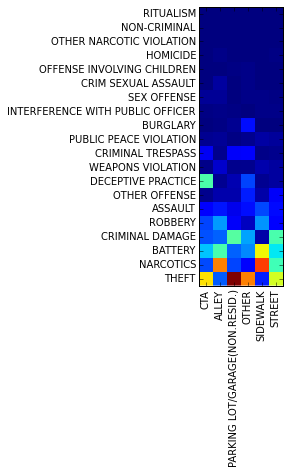

In [8]:
fig = plt.figure(figsize=(20,5))
plt.imshow(L_h, interpolation='none')
plt.yticks(range(len(L0_l)),L0_l);
plt.xticks(range(len(L1_l)),L1_l,rotation='vertical');

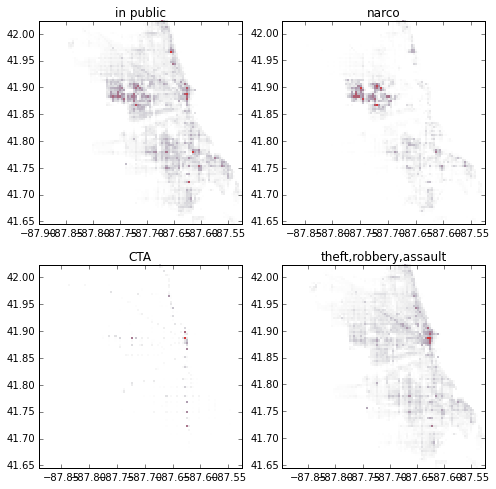

In [13]:
from pylab import hist2d

plt.figure(figsize=(8,8))
plt.subplot(221)
hist2d(X[:,1],X[:,0],bins=100, cmap=cmapp);
plt.title("in public")

subind = L[:,0]=='NARCOTICS'
plt.subplot(222)
hist2d(X[subind,1],X[subind,0],bins=100, cmap=cmapp);
plt.title("narco")

subind = np.char.find(L[:,1],'CTA')>=0
plt.subplot(223)
hist2d(X[subind,1],X[subind,0],bins=100, cmap=cmapp);
plt.title("CTA")

subind = np.logical_or(L[:,0]=='THEFT',np.logical_or(L[:,0]=='ROBBERY',L[:,0]=='ASSAULT'))
plt.subplot(224)
hist2d(X[subind,1],X[subind,0],bins=100, cmap=cmapp);
plt.title('theft,robbery,assault')

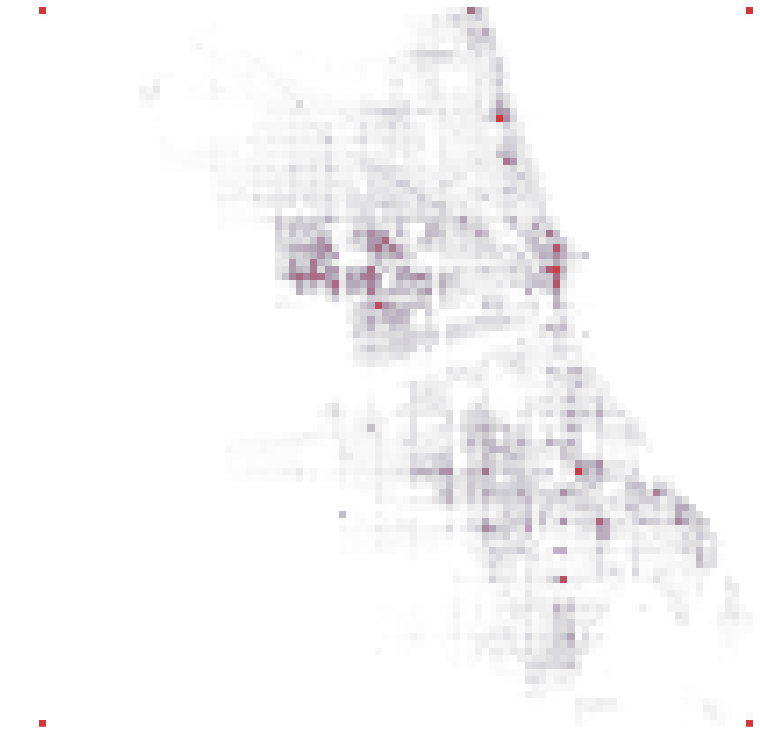

In [59]:
#http://stackoverflow.com/questions/8218608/scipy-savefig-without-frames-axes-only-content
fig = plt.figure(frameon=False)
fig.set_size_inches(10,10)

ax = plt.Axes(fig, [0., 0., 1., 1.])
ax.set_axis_off()
H, yedges, xedges = np.histogram2d(X[:,0], X[:,1], bins=100)
H[0,0]=np.max(H)
H[0,-1]=np.max(H)
H[-1,0]=np.max(H)
H[-1,-1]=np.max(H)
ax.imshow(H,cmap=cmapp,interpolation='none',origin='low',
                extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]])
fig.add_axes(ax)
fig.savefig('../site/im/data.png', dpi=10, transparent='True')

In [35]:
print (yedges[0],xedges[0])
print (yedges[-1],xedges[-1])

(41.644580105000003, -87.899927585)
(42.023024907999996, -87.524388789)


In [36]:
xedges.shape

(101,)